# Cargar Dataset

In [3]:
 # !pip install pandas openpyxl
 # !pip install pandas scikit-learn matplotlib seaborn scikit-learn-extra

In [4]:
 # pip install prophet pmdarima matplotlib seaborn

# Fase 1: Cargar y describir el dataset

In [1]:
import pandas as pd

df = pd.read_excel('/Users/alessandroledesma/Downloads/BD_EMPRESA_PYME.xlsx')
print(df.columns)

Index(['estado', 'numerodoi', 'razonsocial', 'tipodocu', 'nro_efact',
       'descripcion', 'cantidad', 'unid', 'valorunit', 'preciounit',
       'precioventa', 'tipo_moneda', 'tipocambio', 'metodo_pago', 'vendedor',
       'tipoventasunat', 'fecha'],
      dtype='object')


In [2]:
df.info()
df.head()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3944 entries, 0 to 3943
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   estado          3944 non-null   object        
 1   numerodoi       3944 non-null   int64         
 2   razonsocial     3944 non-null   object        
 3   tipodocu        3944 non-null   object        
 4   nro_efact       3944 non-null   object        
 5   descripcion     3944 non-null   object        
 6   cantidad        3944 non-null   int64         
 7   unid            3944 non-null   object        
 8   valorunit       3944 non-null   float64       
 9   preciounit      3944 non-null   float64       
 10  precioventa     3944 non-null   float64       
 11  tipo_moneda     3944 non-null   object        
 12  tipocambio      3944 non-null   float64       
 13  metodo_pago     3944 non-null   object        
 14  vendedor        3944 non-null   object        
 15  tipo

,estado,numerodoi,razonsocial,tipodocu,nro_efact,descripcion,cantidad,unid,valorunit,preciounit,precioventa,tipo_moneda,tipocambio,metodo_pago,vendedor,tipoventasunat,fecha
count,3944,3.944000e+03,3944,3944,3944,3944,3944.000000,3944,3944.000000,3944.000000,3944.000000,3944,3944.000000,3944,3944,3944,3944
unique,1,NaN,155,2,3266,20,NaN,1,NaN,NaN,NaN,1,NaN,1,1,1,NaN
top,Aceptado,NaN,FUNDACION PARA EL DESARROLLO AGRARIO,FACTURA,F00100000322,SELLADORA DE METAL DE 30 CM.,NaN,NIU,NaN,NaN,NaN,PEN,NaN,CONTADO,VENTAS,Nacional,NaN
freq,3944,NaN,63,2605,5,234,NaN,3944,NaN,NaN,NaN,3944,NaN,3944,3944,3944,NaN
mean,NaN,1.751863e+10,NaN,NaN,NaN,NaN,182.788286,NaN,52.072553,61.446105,1185.539009,NaN,3.740434,NaN,NaN,NaN,2024-04-24 19:16:40.405679616
min,NaN,7.473523e+06,NaN,NaN,NaN,NaN,1.000000,NaN,0.101690,0.120000,1.000000,NaN,3.543000,NaN,NaN,NaN,2023-01-01 00:00:00
25%,NaN,2.013047e+10,NaN,NaN,NaN,NaN,19.000000,NaN,0.720340,0.850000,101.475000,NaN,3.702000,NaN,NaN,NaN,2023-11-13 00:00:00
50%,NaN,2.052196e+10,NaN,NaN,NaN,NaN,50.000000,NaN,4.235000,5.000000,308.750000,NaN,3.750000,NaN,NaN,NaN,2024-05-18 00:00:00
75%,NaN,2.060235e+10,NaN,NaN,NaN,NaN,284.000000,NaN,101.690000,120.000000,1350.000000,NaN,3.773000,NaN,NaN,NaN,2024-10-23 00:00:00
max,NaN,2.061346e+10,NaN,NaN,NaN,NaN,1000.000000,NaN,296.610000,350.000000,14000.000000,NaN,3.868000,NaN,NaN,NaN,2025-05-04 00:00:00


# Fase 2: Preprocesamiento de datos

In [3]:
import pandas as pd

# Asegurarse que 'fecha' es datetime
df['fecha'] = pd.to_datetime(df['fecha'])

print("Agregando datos por PYME (numerodoi)...")

# 1. Definir agregaciones básicas
agregaciones_basicas = {
    'precioventa': ['sum', 'mean'],
    'cantidad': ['sum', 'mean'],
    'fecha': ['count', 'min', 'max'],
    'descripcion': ['nunique'],
    'valorunit': ['mean'],
    'preciounit': ['mean']
}

# 2. Realizar agregación básica
df_pymes = df.groupby('numerodoi').agg(agregaciones_basicas)

# 3. Aplanar los nombres de las columnas
df_pymes.columns = ['_'.join(col).strip() for col in df_pymes.columns.values]

# 4. Renombrar columnas a español
df_pymes = df_pymes.rename(columns={
    'precioventa_sum': 'ingresos_totales',
    'precioventa_mean': 'ticket_promedio',
    'cantidad_sum': 'cantidad_total',
    'cantidad_mean': 'cantidad_promedio_venta',
    'fecha_count': 'numero_transacciones',
    'fecha_min': 'fecha_primera_venta',
    'fecha_max': 'fecha_ultima_venta',
    'descripcion_nunique': 'numero_productos_unicos',
    'valorunit_mean': 'valor_unitario_promedio',
    'preciounit_mean': 'precio_unitario_promedio'
})

# 5. Calcular la moda para variables categóricas
def obtener_moda(series):
    moda = series.mode()
    return moda[0] if not moda.empty else None

agregaciones_moda = {
    'metodo_pago': obtener_moda,
    'tipo_moneda': obtener_moda,
    'vendedor': obtener_moda,
    'estado': obtener_moda,
    'unid': obtener_moda
}

df_modas = df.groupby('numerodoi').agg(agregaciones_moda)

# Renombrar columnas de modas
df_modas = df_modas.rename(columns={
    'metodo_pago': 'metodo_pago_preferido',
    'tipo_moneda': 'moneda_preferida',
    'vendedor': 'vendedor_principal',
    'estado': 'estado_comun',
    'unid': 'unidad_comun'
})

# 6. Unir las agregaciones básicas con las modas
df_pymes = df_pymes.join(df_modas)

# 7. Calcular características derivadas
df_pymes['periodo_actividad_dias'] = (df_pymes['fecha_ultima_venta'] - df_pymes['fecha_primera_venta']).dt.days

# 8. Resetear el índice para que 'numerodoi' vuelva a ser una columna
df_pymes = df_pymes.reset_index()

print("\n--- DataFrame Agregado por PYME (df_pymes) ---")
print("\nForma (Shape):")
print(df_pymes.shape)

print("\nInformación (Info):")
df_pymes.info()

print("\nPrimeras Filas (Head):")
print(df_pymes.head())

print("\nDescripción Estadística (Describe):")
print(df_pymes.describe())

Agregando datos por PYME (numerodoi)...

--- DataFrame Agregado por PYME (df_pymes) ---

Forma (Shape):
(155, 17)

Información (Info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   numerodoi                 155 non-null    int64         
 1   ingresos_totales          155 non-null    float64       
 2   ticket_promedio           155 non-null    float64       
 3   cantidad_total            155 non-null    int64         
 4   cantidad_promedio_venta   155 non-null    float64       
 5   numero_transacciones      155 non-null    int64         
 6   fecha_primera_venta       155 non-null    datetime64[ns]
 7   fecha_ultima_venta        155 non-null    datetime64[ns]
 8   numero_productos_unicos   155 non-null    int64         
 9   valor_unitario_promedio   155 non-null    float64       
 10  precio_unit

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Asumiendo que 'df_pymes' es tu DataFrame agregado y en español ---

# 1. Definir las listas de columnas seleccionadas
columnas_numericas = [
    'ingresos_totales',
    'ticket_promedio',
    'cantidad_total',
    'cantidad_promedio_venta',
    'numero_transacciones',
    'numero_productos_unicos',
    'valor_unitario_promedio',
    'precio_unitario_promedio',
    'periodo_actividad_dias'
]

columnas_categoricas = [
    'metodo_pago_preferido',
    'moneda_preferida',
    'unidad_comun',
    'vendedor_principal',
    'estado_comun'
]

# Verificar que todas las columnas existan en df_pymes
columnas_numericas = [col for col in columnas_numericas if col in df_pymes.columns]
columnas_categoricas = [col for col in columnas_categoricas if col in df_pymes.columns]

print(f"Columnas numéricas a usar: {columnas_numericas}")
print(f"Columnas categóricas a usar: {columnas_categoricas}")

# Seleccionar solo las columnas que vamos a usar (y el ID para más tarde)
columnas_a_usar = columnas_numericas + columnas_categoricas
df_para_clustering = df_pymes[['numerodoi'] + columnas_a_usar].copy()

# 2. Crear el pipeline numérico
transformador_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Rellena NaN con la media
    ('scaler', StandardScaler())                 # Escala los datos
])

# 3. Crear el pipeline categórico
transformador_categorico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Rellena None/NaN con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Crea columnas dummy
])

# 4. Crear el ColumnTransformer
# Esto aplica el pipeline correcto a cada tipo de columna
preprocesador = ColumnTransformer(
    transformers=[
        ('num', transformador_numerico, columnas_numericas),
        ('cat', transformador_categorico, columnas_categoricas)
    ],
    remainder='passthrough' # Mantiene columnas no especificadas (aunque aquí no hay)
)

# 5. Aplicar el preprocesamiento
# Usamos .set_index('numerodoi') para no incluir el ID en el procesamiento
X_procesado = preprocesador.fit_transform(df_para_clustering.set_index('numerodoi'))

print("\n--- Datos Preprocesados Listos para Clustering ---")
print("Forma (Shape) de los datos procesados (PYMEs, Características):")
print(X_procesado.shape)

# Opcional: Mostrar una pequeña parte (será un array de NumPy, no un DataFrame)
print("\nEjemplo de los datos procesados (primeras 5 filas, primeras 10 columnas):")
print(X_procesado[:5, :10])

Columnas numéricas a usar: ['ingresos_totales', 'ticket_promedio', 'cantidad_total', 'cantidad_promedio_venta', 'numero_transacciones', 'numero_productos_unicos', 'valor_unitario_promedio', 'precio_unitario_promedio', 'periodo_actividad_dias']
Columnas categóricas a usar: ['metodo_pago_preferido', 'moneda_preferida', 'unidad_comun', 'vendedor_principal', 'estado_comun']

--- Datos Preprocesados Listos para Clustering ---
Forma (Shape) de los datos procesados (PYMEs, Características):
(155, 14)

Ejemplo de los datos procesados (primeras 5 filas, primeras 10 columnas):
[[-0.34117682  0.22447115 -0.19166194  0.65420323 -0.67947203 -0.89532664
   1.56966785  1.56964021 -0.02403409  1.        ]
 [-1.1898773  -1.68956104  0.70756668  0.6752437   0.31880441 -0.49654609
  -2.20785831 -2.20786262 -0.94835254  1.        ]
 [ 0.0184468  -0.64906964  0.47100912 -0.2685872   0.94272719  1.49735662
  -0.82040133 -0.82039598 -0.87832841  1.        ]
 [ 1.69477452  1.30935882 -0.06615214 -0.72917815  

# Fase 3 & 4: Implementación y Evaluación de Algoritmos de Clustering (K-Means y K-Medoids)

Calculando Métricas para K-Means y K-Medoids (Inercia, Silueta, Davies-Bouldin, Calinski-Harabasz)...
Procesando k=2...
Procesando k=3...
Procesando k=4...
Procesando k=5...
Procesando k=6...
Procesando k=7...
Procesando k=8...
Procesando k=9...
Procesando k=10...


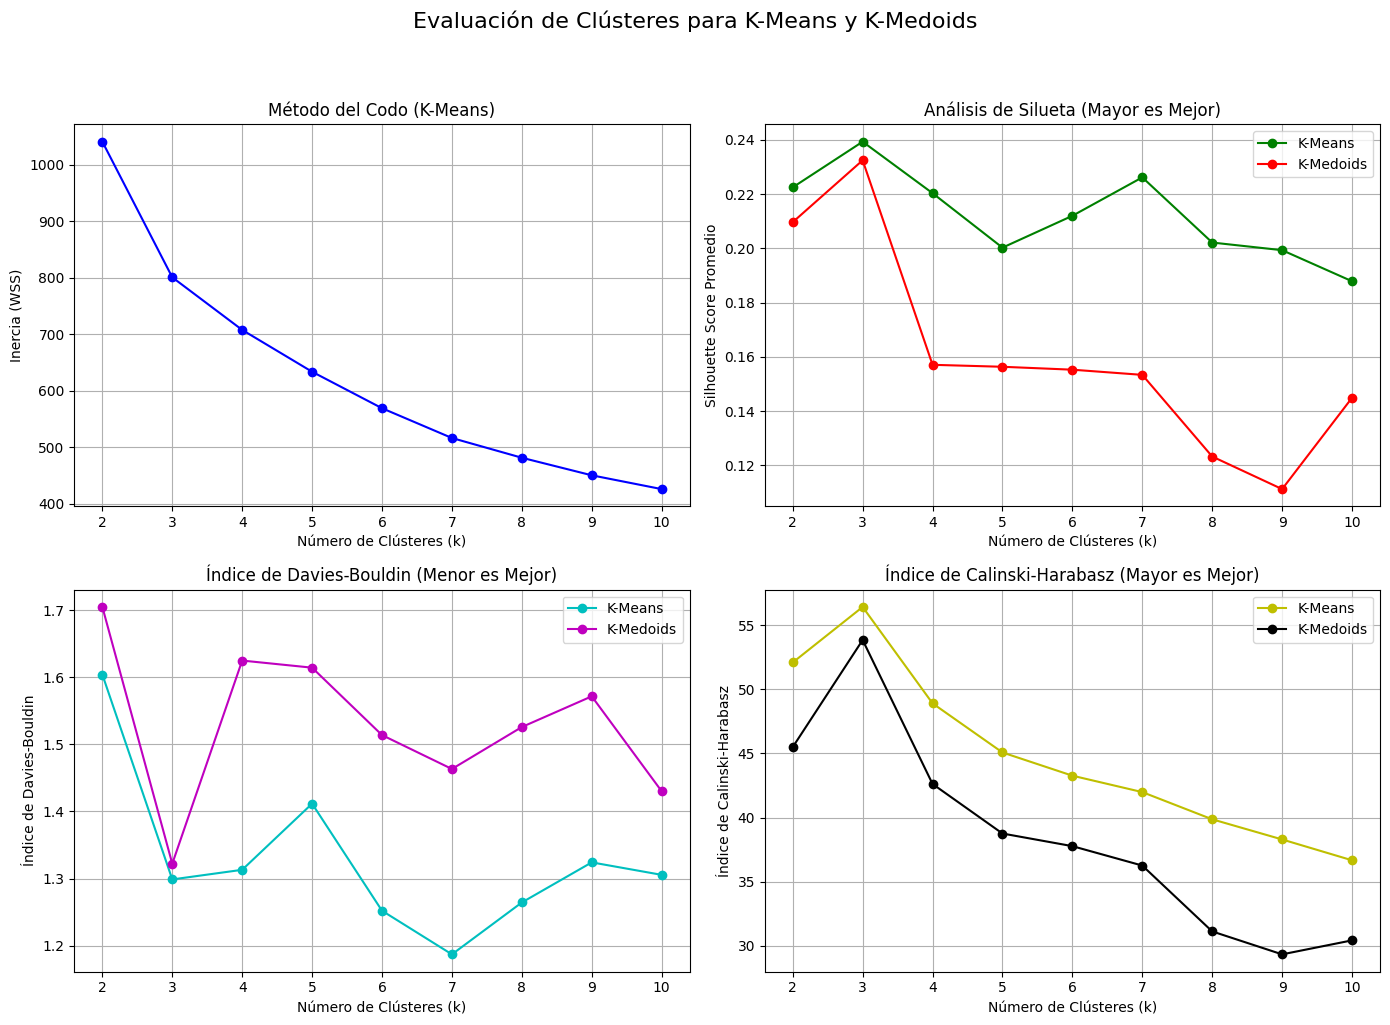


--- K Óptimo Sugerido por Métrica ---
Silueta (K-Means): 3
Silueta (K-Medoids): 3
Davies-Bouldin (K-Means): 7
Davies-Bouldin (K-Medoids): 3
Calinski-Harabasz (K-Means): 3
Calinski-Harabasz (K-Medoids): 3

--- Implementando y evaluando para k = 3 ---

--- Resultados K-Means (k=3) ---
Silhouette Score: 0.2393
Índice de Davies-Bouldin: 1.2988
Índice de Calinski-Harabasz: 56.4227

--- Resultados K-Medoids (k=3) ---
Silhouette Score: 0.2324
Índice de Davies-Bouldin: 1.3222
Índice de Calinski-Harabasz: 53.8457


In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import read_sample
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics.pairwise import pairwise_distances

# --- Asumiendo que 'X_procesado' es tu array de NumPy preprocesado ---

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Implementación simple de K-Medoids usando sklearn
class SimpleKMedoids:
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.medoid_indices_ = None
        self.labels_ = None
        
    def fit_predict(self, X):
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        
        # Inicializar medoides aleatoriamente
        self.medoid_indices_ = np.random.choice(n_samples, self.n_clusters, replace=False)
        
        # Calcular matriz de distancias
        distances = pairwise_distances(X)
        
        for _ in range(100):  # máximo 100 iteraciones
            # Asignar puntos al medoide más cercano
            labels = np.argmin(distances[self.medoid_indices_], axis=0)
            
            # Actualizar medoides
            new_medoid_indices = []
            for i in range(self.n_clusters):
                cluster_points = np.where(labels == i)[0]
                if len(cluster_points) > 0:
                    # Encontrar el punto que minimiza la suma de distancias dentro del cluster
                    cluster_distances = distances[np.ix_(cluster_points, cluster_points)]
                    medoid_idx = cluster_points[np.argmin(cluster_distances.sum(axis=1))]
                    new_medoid_indices.append(medoid_idx)
                else:
                    new_medoid_indices.append(self.medoid_indices_[i])
            
            new_medoid_indices = np.array(new_medoid_indices)
            
            # Comprobar convergencia
            if np.array_equal(self.medoid_indices_, new_medoid_indices):
                break
                
            self.medoid_indices_ = new_medoid_indices
        
        self.labels_ = labels
        return labels

# Rango de k a probar
k_range = range(2, 11)

# Listas para almacenar métricas
inertia = []
silhouette_scores_kmeans = []
silhouette_scores_kmedoids = []
db_scores_kmeans = []
db_scores_kmedoids = []
ch_scores_kmeans = []
ch_scores_kmedoids = []

print("Calculando Métricas para K-Means y K-Medoids (Inercia, Silueta, Davies-Bouldin, Calinski-Harabasz)...")
for k in k_range:
    print(f"Procesando k={k}...")
    # K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_kmeans = kmeans.fit_predict(X_procesado)
    inertia.append(kmeans.inertia_)
    silhouette_scores_kmeans.append(silhouette_score(X_procesado, labels_kmeans))
    db_scores_kmeans.append(davies_bouldin_score(X_procesado, labels_kmeans))
    ch_scores_kmeans.append(calinski_harabasz_score(X_procesado, labels_kmeans))

    # K-Medoids
    kmedoids_model = SimpleKMedoids(n_clusters=k, random_state=42)
    labels_kmedoids = kmedoids_model.fit_predict(X_procesado)
    silhouette_scores_kmedoids.append(silhouette_score(X_procesado, labels_kmedoids))
    db_scores_kmedoids.append(davies_bouldin_score(X_procesado, labels_kmedoids))
    ch_scores_kmedoids.append(calinski_harabasz_score(X_procesado, labels_kmedoids))

# --- Graficar los Resultados ---
plt.figure(figsize=(14, 10))

# Gráfico 1: Método del Codo
plt.subplot(2, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia (WSS)')
plt.title('Método del Codo (K-Means)')
plt.xticks(k_range)
plt.grid(True)

# Gráfico 2: Análisis de Silueta
plt.subplot(2, 2, 2)
plt.plot(k_range, silhouette_scores_kmeans, 'go-', label='K-Means')
plt.plot(k_range, silhouette_scores_kmedoids, 'ro-', label='K-Medoids')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Silhouette Score Promedio')
plt.title('Análisis de Silueta (Mayor es Mejor)')
plt.xticks(k_range)
plt.legend()
plt.grid(True)

# Gráfico 3: Índice de Davies-Bouldin
plt.subplot(2, 2, 3)
plt.plot(k_range, db_scores_kmeans, 'co-', label='K-Means')
plt.plot(k_range, db_scores_kmedoids, 'mo-', label='K-Medoids')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Índice de Davies-Bouldin')
plt.title('Índice de Davies-Bouldin (Menor es Mejor)')
plt.xticks(k_range)
plt.legend()
plt.grid(True)

# Gráfico 4: Índice de Calinski-Harabasz
plt.subplot(2, 2, 4)
plt.plot(k_range, ch_scores_kmeans, 'yo-', label='K-Means')
plt.plot(k_range, ch_scores_kmedoids, 'ko-', label='K-Medoids')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Índice de Calinski-Harabasz')
plt.title('Índice de Calinski-Harabasz (Mayor es Mejor)')
plt.xticks(k_range)
plt.legend()
plt.grid(True)

plt.suptitle("Evaluación de Clústeres para K-Means y K-Medoids", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Encontrar el k óptimo sugerido por cada métrica
k_optimo_sil_kmeans = k_range[np.argmax(silhouette_scores_kmeans)]
k_optimo_sil_kmedoids = k_range[np.argmax(silhouette_scores_kmedoids)]
k_optimo_db_kmeans = k_range[np.argmin(db_scores_kmeans)]
k_optimo_db_kmedoids = k_range[np.argmin(db_scores_kmedoids)]
k_optimo_ch_kmeans = k_range[np.argmax(ch_scores_kmeans)]
k_optimo_ch_kmedoids = k_range[np.argmax(ch_scores_kmedoids)]

print(f"\n--- K Óptimo Sugerido por Métrica ---")
print(f"Silueta (K-Means): {k_optimo_sil_kmeans}")
print(f"Silueta (K-Medoids): {k_optimo_sil_kmedoids}")
print(f"Davies-Bouldin (K-Means): {k_optimo_db_kmeans}")
print(f"Davies-Bouldin (K-Medoids): {k_optimo_db_kmedoids}")
print(f"Calinski-Harabasz (K-Means): {k_optimo_ch_kmeans}")
print(f"Calinski-Harabasz (K-Medoids): {k_optimo_ch_kmedoids}")

# --- Implementar y Evaluar para el k Elegido (ej. k=3) ---
k_final_elegido = 3
print(f"\n--- Implementando y evaluando para k = {k_final_elegido} ---")

# K-Means
kmeans_final = KMeans(n_clusters=k_final_elegido, random_state=42, n_init=10)
labels_kmeans_final = kmeans_final.fit_predict(X_procesado)
silhouette_kmeans = silhouette_score(X_procesado, labels_kmeans_final)
davies_bouldin_kmeans = davies_bouldin_score(X_procesado, labels_kmeans_final)
calinski_harabasz_kmeans = calinski_harabasz_score(X_procesado, labels_kmeans_final)

print(f"\n--- Resultados K-Means (k={k_final_elegido}) ---")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Índice de Davies-Bouldin: {davies_bouldin_kmeans:.4f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz_kmeans:.4f}")

# K-Medoids
kmedoids_final = SimpleKMedoids(n_clusters=k_final_elegido, random_state=42)
labels_kmedoids_final = kmedoids_final.fit_predict(X_procesado)
silhouette_kmedoids = silhouette_score(X_procesado, labels_kmedoids_final)
davies_bouldin_kmedoids = davies_bouldin_score(X_procesado, labels_kmedoids_final)
calinski_harabasz_kmedoids = calinski_harabasz_score(X_procesado, labels_kmedoids_final)

print(f"\n--- Resultados K-Medoids (k={k_final_elegido}) ---")
print(f"Silhouette Score: {silhouette_kmedoids:.4f}")
print(f"Índice de Davies-Bouldin: {davies_bouldin_kmedoids:.4f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz_kmedoids:.4f}")

In [7]:
import pandas as pd

# 1. Crear df_temp como antes
df_temp = df_para_clustering.copy().reset_index(drop=True)
if 'numerodoi' not in df_temp.columns:
     if df_pymes.shape[0] == df_temp.shape[0]:
         df_temp['numerodoi'] = df_pymes['numerodoi'].values
     else:
         print("ERROR CRÍTICO: No se puede recuperar 'numerodoi'.")

df_temp['cluster_kmeans'] = labels_kmeans_final
df_temp['cluster_kmedoids'] = labels_kmedoids_final

print("\ndf_temp con etiquetas añadidas:")
print(df_temp.head())
print(df_temp.info())

# 2. <<< ¡EL CAMBIO CLAVE! >>>
# Eliminar columnas de clúster antiguas de df_pymes ANTES del merge.
# Usamos errors='ignore' para que no falle si las columnas NO existen.
print("\nLimpiando df_pymes de columnas de clúster antiguas...")
df_pymes_limpio = df_pymes.drop(columns=[
    'cluster_kmeans', 'cluster_kmedoids',
    'cluster_kmeans_x', 'cluster_kmedoids_x',
    'cluster_kmeans_y', 'cluster_kmedoids_y'
], errors='ignore')
print("Columnas de df_pymes_limpio:", df_pymes_limpio.columns.tolist())


# 3. Realizar el merge con df_pymes_limpio
if 'numerodoi' in df_temp.columns:
    print("\nRealizando el merge final...")
    df_labels_para_merge = df_temp[['numerodoi', 'cluster_kmeans', 'cluster_kmedoids']]

    df_pymes_con_clusters = pd.merge(df_pymes_limpio, # Usamos la versión limpia
                                     df_labels_para_merge,
                                     on='numerodoi',
                                     how='left')

    print("\nDataFrame final (df_pymes_con_clusters):")
    print(df_pymes_con_clusters.head())
    print(df_pymes_con_clusters.info()) # Aquí DEBEN aparecer sin sufijo

    # 4. ¡Intentar el value_counts() por última vez!

    print("\nConteo por Clúster (K-Means):")
    print(df_pymes_con_clusters['cluster_kmeans'].value_counts())
    print("\nConteo por Clúster (K-Medoids):")
    print(df_pymes_con_clusters['cluster_kmedoids'].value_counts())

else:
    print("\nNo se pudo realizar el merge porque 'numerodoi' no se encontró en df_temp.")


df_temp con etiquetas añadidas:
   numerodoi  ingresos_totales  ticket_promedio  cantidad_total  \
0    7473523          25526.00      1276.300000            4280   
1    7529662          13983.11       499.396786            6021   
2    8113546          30417.12       921.730909            5563   
3   10560771          53216.29      1716.654516            4523   
4   21080153          30088.20      1253.675000            2641   

   cantidad_promedio_venta  numero_transacciones  numero_productos_unicos  \
0               214.000000                    20                       12   
1               215.035714                    28                       13   
2               168.575758                    33                       18   
3               145.903226                    31                       16   
4               110.041667                    24                       14   

   valor_unitario_promedio  precio_unitario_promedio  periodo_actividad_dias  \
0                78.4

In [8]:
import pandas as pd

# --- Asumiendo que 'df_pymes_con_clusters' existe y tiene las etiquetas ---

# Seleccionar las columnas numéricas que usamos (o las más relevantes)
columnas_numericas_analisis = [
    'ingresos_totales',
    'ticket_promedio',
    'cantidad_total',
    'numero_transacciones',
    'numero_productos_unicos',
    'periodo_actividad_dias'
]

print("\n--- Características Promedio por Clúster (K-Means) ---")
kmeans_summary = df_pymes_con_clusters.groupby('cluster_kmeans')[columnas_numericas_analisis].mean()
print(kmeans_summary)

print("\n--- Características Promedio por Clúster (K-Medoids) ---")
kmedoids_summary = df_pymes_con_clusters.groupby('cluster_kmedoids')[columnas_numericas_analisis].mean()
print(kmedoids_summary)


--- Características Promedio por Clúster (K-Means) ---
                ingresos_totales  ticket_promedio  cantidad_total  \
cluster_kmeans                                                      
0                   40199.606458      1177.879337     6617.937500   
1                   16699.590000       791.929443     3803.571429   
2                   33239.738448      1523.470747     3739.327586   

                numero_transacciones  numero_productos_unicos  \
cluster_kmeans                                                  
0                          34.083333                16.854167   
1                          21.122449                12.795918   
2                          21.948276                13.310345   

                periodo_actividad_dias  
cluster_kmeans                          
0                           805.416667  
1                           739.469388  
2                           757.706897  

--- Características Promedio por Clúster (K-Medoids) ---
         

# Fase 5: Implementación y Comparación de Algoritmos de Series Temporales por Clúster

Usando la columna: cluster_kmedoids

Shape de df_con_clusters: (3944, 18)
Valores nulos en la columna de clúster: 0

--- Series Temporales Mensuales Agregadas por Clúster (K-Medoids) ---
cluster_kmedoids         0         1         2
fecha                                         
2023-01-31        76752.37  61955.90  10946.82
2023-02-28        57614.45  37738.18  10885.35
2023-03-31        87130.78  68736.61  13715.74
2023-04-30        46789.40  33206.06  12047.40
2023-05-31        74304.95  63322.30  19392.40


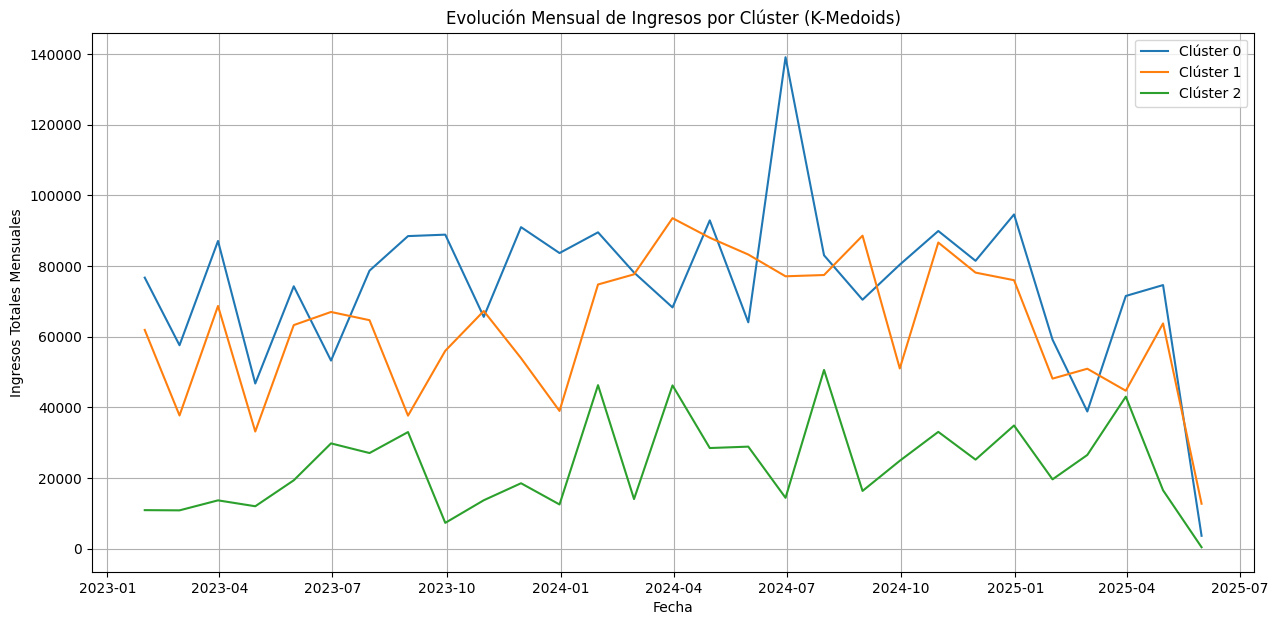

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Asumiendo que 'df' es tu DataFrame original (transaccional)
# --- y 'df_pymes_con_clusters' es el DataFrame con las etiquetas ---

# 1. <<< ¡USAMOS K-MEDOIDS! >>>
columna_cluster_elegida = 'cluster_kmedoids'

print(f"Usando la columna: {columna_cluster_elegida}")

# 2. Seleccionar solo el ID y la etiqueta de clúster elegida
df_labels = df_pymes_con_clusters[['numerodoi', columna_cluster_elegida]].copy()

# 3. Unir (Merge) las etiquetas de clúster con el DataFrame original (df)
df_con_clusters = pd.merge(df, df_labels, on='numerodoi', how='left')

# Verificar que la unión funcionó y no hay PYMEs sin clúster
print(f"\nShape de df_con_clusters: {df_con_clusters.shape}")
print(f"Valores nulos en la columna de clúster: {df_con_clusters[columna_cluster_elegida].isnull().sum()}")
# Si da > 0, debemos revisar por qué algunas PYMES no tienen clúster.

# 4. Agregar los ingresos ('precioventa') por fecha Y por clúster (Mensual)
df_ts = df_con_clusters[['fecha', columna_cluster_elegida, 'precioventa']].copy()
df_ts = df_ts.set_index('fecha')
df_ts_mensual_por_cluster = df_ts.groupby(columna_cluster_elegida).resample('M')['precioventa'].sum()
df_ts_mensual = df_ts_mensual_por_cluster.unstack(level=0)
df_ts_mensual = df_ts_mensual.fillna(0)

print("\n--- Series Temporales Mensuales Agregadas por Clúster (K-Medoids) ---")
print(df_ts_mensual.head())

# 5. Visualizar las series temporales históricas por clúster
plt.figure(figsize=(15, 7))
for cluster_id in df_ts_mensual.columns:
    plt.plot(df_ts_mensual.index, df_ts_mensual[cluster_id], label=f'Clúster {int(cluster_id)}') # Usamos int() para etiquetas más limpias

plt.title('Evolución Mensual de Ingresos por Clúster (K-Medoids)')
plt.xlabel('Fecha')
plt.ylabel('Ingresos Totales Mensuales')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# --- Asumiendo 'df' y 'df_pymes_con_clusters' existen ---

print("--- Bloque 1: Preparación y Evaluación de Prophet ---")

# --- PASO 5.1: PREPARAR DATOS ---
columna_cluster_elegida = 'cluster_kmedoids'
print(f"Usando la columna: {columna_cluster_elegida}")

df_labels = df_pymes_con_clusters[['numerodoi', columna_cluster_elegida]].copy()
df_con_clusters = pd.merge(df, df_labels, on='numerodoi', how='left')

df_ts = df_con_clusters[['fecha', columna_cluster_elegida, 'precioventa']].copy()
df_ts = df_ts.set_index('fecha')
df_ts_mensual_por_cluster = df_ts.groupby(columna_cluster_elegida).resample('M')['precioventa'].sum()
df_ts_mensual = df_ts_mensual_por_cluster.unstack(level=0)
df_ts_mensual = df_ts_mensual.fillna(0)
print("\nSeries Temporales Mensuales Agregadas:")
print(df_ts_mensual.head())

# --- PASO 5.2: DIVIDIR EN ENTRENAMIENTO Y PRUEBA ---
test_size = 6
train_df = df_ts_mensual[:-test_size]
test_df = df_ts_mensual[-test_size:]
print(f"\nDatos de Entrenamiento (Shape): {train_df.shape}")
print(f"Datos de Prueba (Shape): {test_df.shape}")

# --- PASO 5.3: ENTRENAR Y EVALUAR PROPHET ---
resultados_prophet_eval = {} # Usamos un nombre diferente para claridad
metricas_resumen_eval = []

def calcular_metricas(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

print("\n--- Entrenando y Evaluando Prophet en Datos de Prueba ---")
for cluster_id in train_df.columns:
    print(f"Procesando Clúster {int(cluster_id)}...")
    train_series = train_df[cluster_id]
    test_series = test_df[cluster_id]

    df_prophet_train = train_series.reset_index()
    df_prophet_train.columns = ['ds', 'y']
    df_prophet_train['ds'] = pd.to_datetime(df_prophet_train['ds'])

    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(df_prophet_train)

    future = model.make_future_dataframe(periods=len(test_series), freq='M')
    forecast = model.predict(future)
    pred_test = forecast['yhat'][-len(test_series):].values

    metricas = calcular_metricas(test_series.values, pred_test)
    resultados_prophet_eval[cluster_id] = {'modelo': model, 'predicciones': pred_test, 'metricas': metricas}
    print(f"Clúster {int(cluster_id)} - Métricas: {metricas}")

    row = {'Clúster': int(cluster_id), 'Modelo': 'Prophet_Eval'}
    row.update(metricas)
    metricas_resumen_eval.append(row)

df_metricas_eval = pd.DataFrame(metricas_resumen_eval)
print("\n--- Resumen de Métricas de Evaluación (Prophet) ---")
print(df_metricas_eval.round(2))

/Users/alessandroledesma/Seminario-II/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
15:16:40 - cmdstanpy - INFO - Chain [1] start processing


--- Bloque 1: Preparación y Evaluación de Prophet ---
Usando la columna: cluster_kmedoids

Series Temporales Mensuales Agregadas:
cluster_kmedoids         0         1         2
fecha                                         
2023-01-31        76752.37  61955.90  10946.82
2023-02-28        57614.45  37738.18  10885.35
2023-03-31        87130.78  68736.61  13715.74
2023-04-30        46789.40  33206.06  12047.40
2023-05-31        74304.95  63322.30  19392.40

Datos de Entrenamiento (Shape): (23, 3)
Datos de Prueba (Shape): (6, 3)

--- Entrenando y Evaluando Prophet en Datos de Prueba ---
Procesando Clúster 0...


15:16:46 - cmdstanpy - INFO - Chain [1] done processing
15:16:46 - cmdstanpy - INFO - Chain [1] start processing
15:16:46 - cmdstanpy - INFO - Chain [1] start processing
15:16:46 - cmdstanpy - INFO - Chain [1] done processing
15:16:46 - cmdstanpy - INFO - Chain [1] done processing
15:16:46 - cmdstanpy - INFO - Chain [1] start processing
15:16:46 - cmdstanpy - INFO - Chain [1] start processing


Clúster 0 - Métricas: {'RMSE': np.float64(43401.008963809014), 'MAE': 33934.48045813694, 'MAPE': 3.0939749188884416}
Procesando Clúster 1...
Clúster 1 - Métricas: {'RMSE': np.float64(54976.465461614935), 'MAE': 48647.59733030662, 'MAPE': 1.8631039207941196}
Procesando Clúster 2...


15:16:52 - cmdstanpy - INFO - Chain [1] done processing


Clúster 2 - Métricas: {'RMSE': np.float64(50759.706284215914), 'MAE': 42332.15808144834, 'MAPE': 19.888430640741745}

--- Resumen de Métricas de Evaluación (Prophet) ---
   Clúster        Modelo      RMSE       MAE   MAPE
0        0  Prophet_Eval  43401.01  33934.48   3.09
1        1  Prophet_Eval  54976.47  48647.60   1.86
2        2  Prophet_Eval  50759.71  42332.16  19.89


15:17:01 - cmdstanpy - INFO - Chain [1] start processing
15:17:01 - cmdstanpy - INFO - Chain [1] done processing
15:17:01 - cmdstanpy - INFO - Chain [1] done processing
15:17:01 - cmdstanpy - INFO - Chain [1] start processing
15:17:01 - cmdstanpy - INFO - Chain [1] start processing
15:17:01 - cmdstanpy - INFO - Chain [1] done processing
15:17:01 - cmdstanpy - INFO - Chain [1] done processing
15:17:01 - cmdstanpy - INFO - Chain [1] start processing
15:17:01 - cmdstanpy - INFO - Chain [1] start processing



--- Bloque 2: Re-entrenamiento y Pronóstico Futuro ---
Se pronosticarán 19 meses hasta Diciembre de 2026.
Re-entrenando Clúster 0...
Pronóstico para Clúster 0 generado.
Re-entrenando Clúster 1...
Pronóstico para Clúster 1 generado.
Re-entrenando Clúster 2...


15:17:01 - cmdstanpy - INFO - Chain [1] done processing


Pronóstico para Clúster 2 generado.

--- Generando Gráficos de Pronósticos Prophet hasta 2026 ---


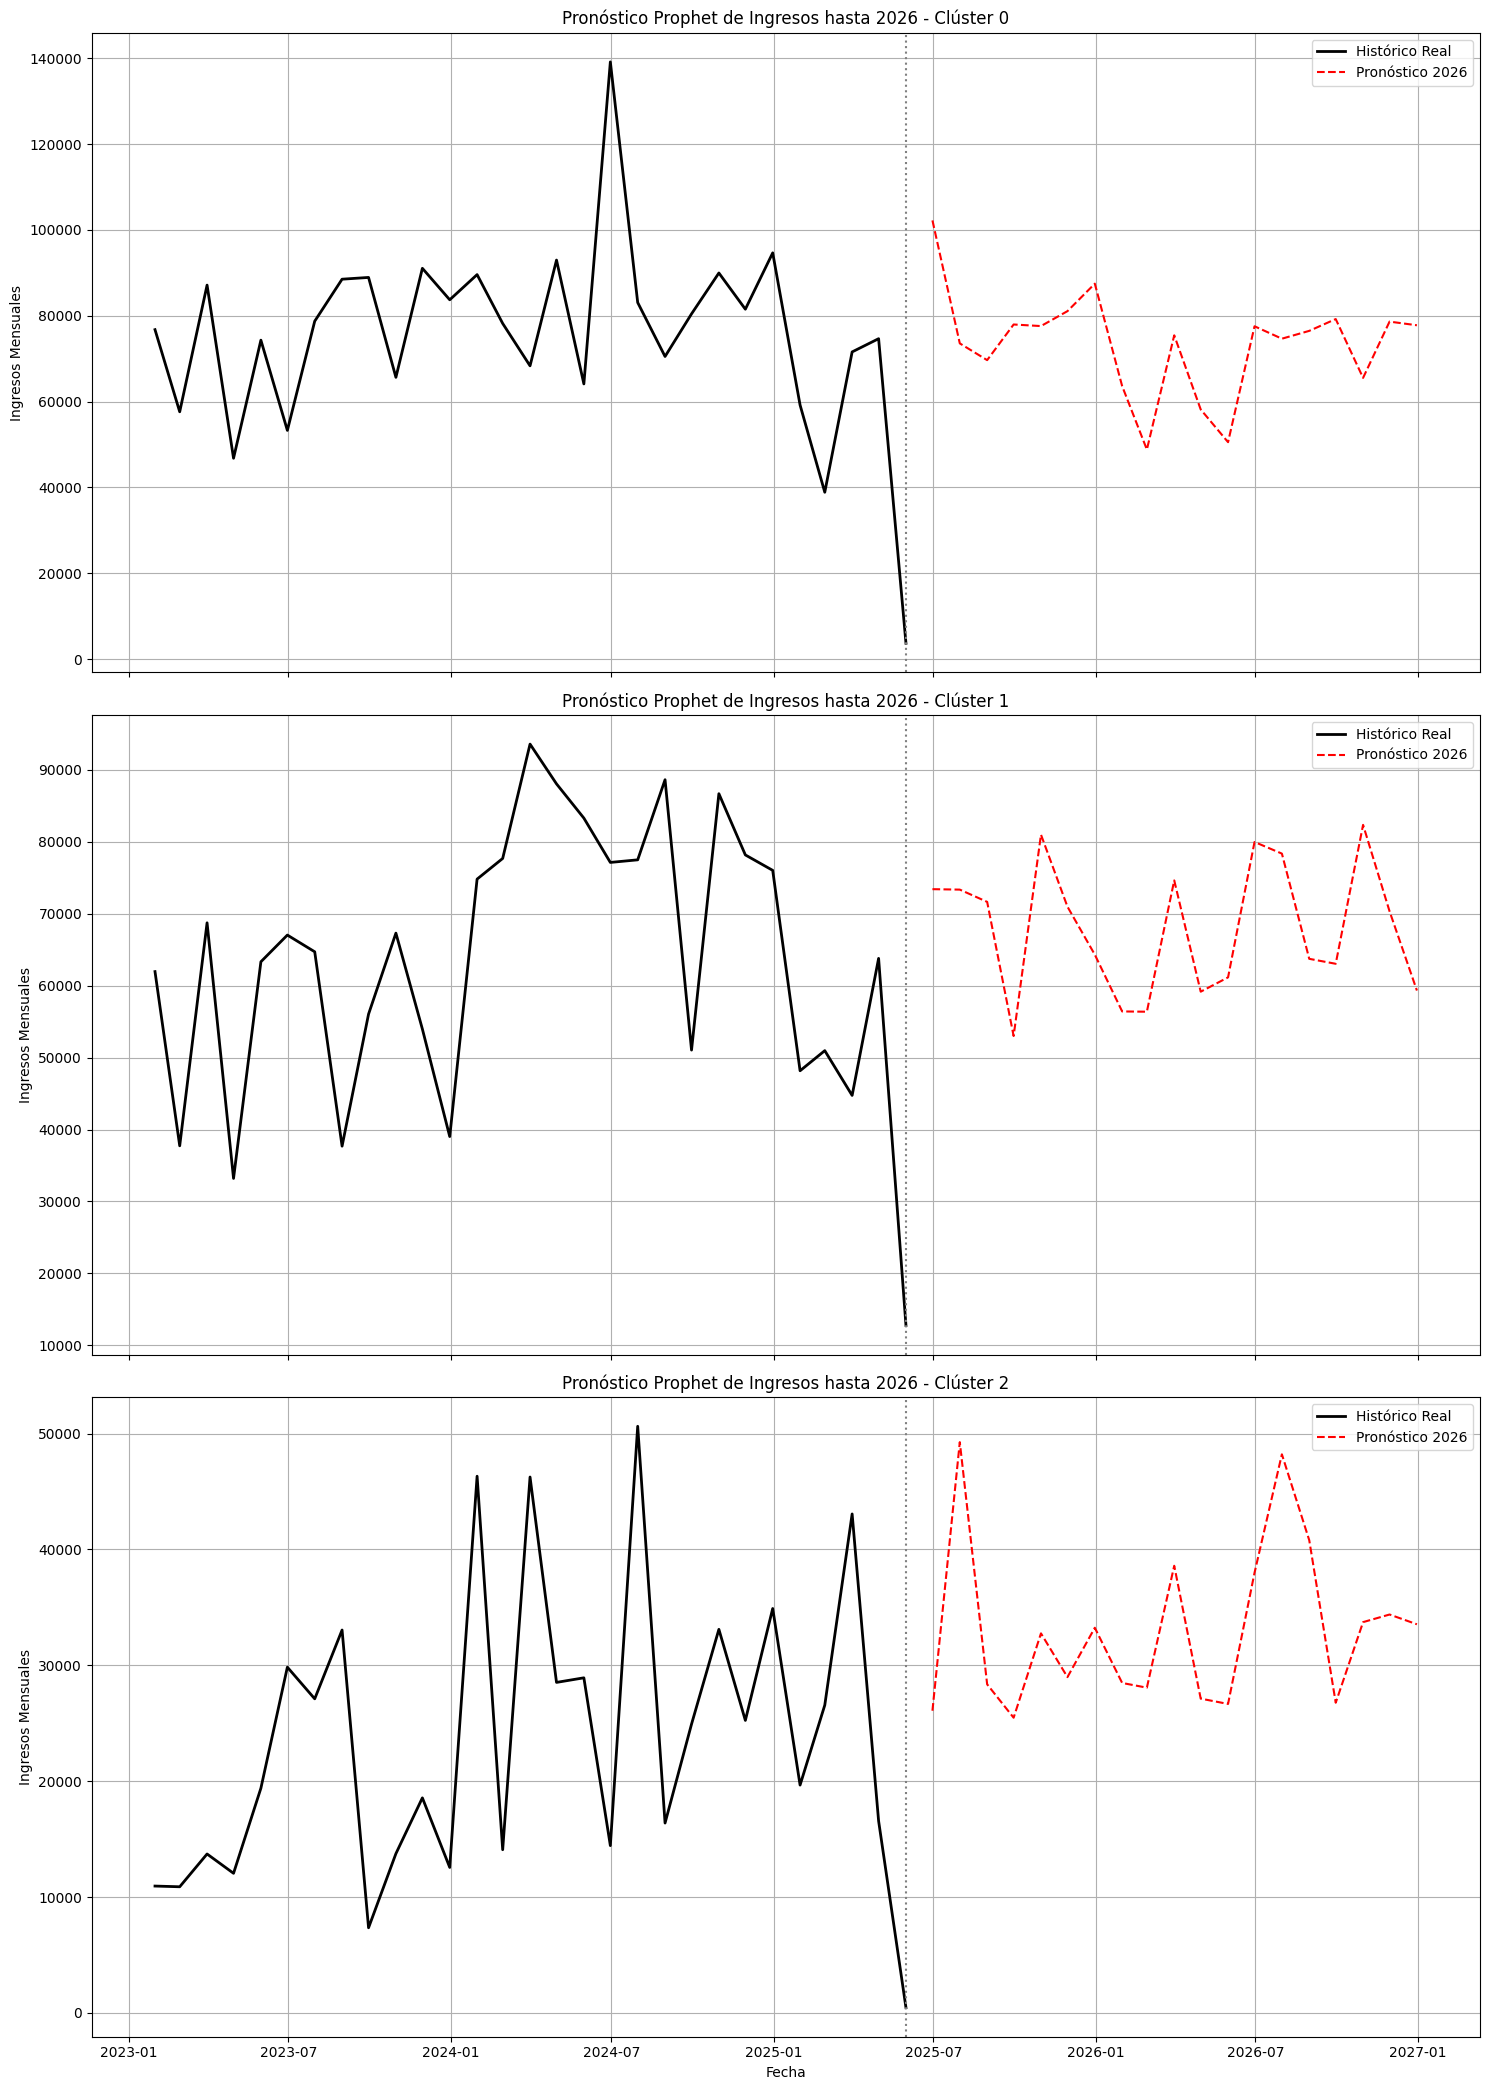

In [11]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# --- Asumiendo que 'df_ts_mensual' existe (del Bloque 1) ---

print("\n--- Bloque 2: Re-entrenamiento y Pronóstico Futuro ---")

# --- PASO 5.4: RE-ENTRENAR Y PRONOSTICAR HASTA 2026 ---
ultima_fecha = df_ts_mensual.index[-1]
fecha_final_pronostico = pd.to_datetime('2026-12-31')
meses_a_predecir = (fecha_final_pronostico.year - ultima_fecha.year) * 12 + \
                   (fecha_final_pronostico.month - ultima_fecha.month)
print(f"Se pronosticarán {meses_a_predecir} meses hasta Diciembre de 2026.")

pronosticos_2026 = {}

for cluster_id in df_ts_mensual.columns:
    print(f"Re-entrenando Clúster {int(cluster_id)}...")
    full_series = df_ts_mensual[cluster_id]
    df_prophet_full = full_series.reset_index()
    df_prophet_full.columns = ['ds', 'y']
    df_prophet_full['ds'] = pd.to_datetime(df_prophet_full['ds'])

    # Instanciar y entrenar con TODOS los datos
    model_full = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model_full.fit(df_prophet_full)

    # Crear futuro y predecir
    future_2026 = model_full.make_future_dataframe(periods=meses_a_predecir, freq='M')
    forecast_2026 = model_full.predict(future_2026)
    # Guardar solo las predicciones futuras
    pronosticos_2026[cluster_id] = forecast_2026[forecast_2026['ds'] > ultima_fecha][['ds', 'yhat']].set_index('ds')
    print(f"Pronóstico para Clúster {int(cluster_id)} generado.")

# --- PASO 5.5: VISUALIZAR RESULTADOS ---
print("\n--- Generando Gráficos de Pronósticos Prophet hasta 2026 ---")
n_clusters = len(df_ts_mensual.columns)
fig, axes = plt.subplots(n_clusters, 1, figsize=(15, 7 * n_clusters), sharex=True)
if n_clusters == 1: axes = [axes]

for i, cluster_id in enumerate(df_ts_mensual.columns):
    ax = axes[i]
    # Datos históricos
    ax.plot(df_ts_mensual.index, df_ts_mensual[cluster_id], label='Histórico Real', color='black', linewidth=2)

    # Pronósticos futuros
    ax.plot(pronosticos_2026[cluster_id].index, pronosticos_2026[cluster_id]['yhat'], label='Pronóstico 2026', color='red', linestyle='--')

    ax.set_title(f'Pronóstico Prophet de Ingresos hasta 2026 - Clúster {int(cluster_id)}')
    ax.set_ylabel('Ingresos Mensuales')
    ax.legend()
    ax.grid(True)
    ax.axvline(ultima_fecha, color='gray', linestyle=':', label='Inicio Pronóstico') # Línea de inicio

plt.xlabel('Fecha')
plt.tight_layout()
plt.show()

# Fase 6: Interpretación de resultados

In [12]:
import pandas as pd

# --- Asumiendo que 'df_pymes_con_clusters' existe ---

# Seleccionar las columnas numéricas clave para el perfilado
columnas_numericas_analisis = [
    'ingresos_totales',
    'ticket_promedio',
    'cantidad_total',
    'cantidad_promedio_venta',
    'numero_transacciones',
    'numero_productos_unicos',
    'periodo_actividad_dias'
]

# Añadir también las categóricas para ver su distribución (opcional pero útil)
# columnas_categoricas_analisis = [
#     'metodo_pago_preferido',
#     'moneda_preferida',
#     'unidad_comun',
#     'vendedor_principal'
# ]

print("\n--- Características Promedio por Clúster (K-Medoids) ---")
kmedoids_summary = df_pymes_con_clusters.groupby('cluster_kmedoids')[columnas_numericas_analisis].mean()
print(kmedoids_summary.round(2)) # Redondeamos para leer mejor

# Si quieres ver la moda de las categóricas:
# print("\n--- Características Categóricas Modales por Clúster (K-Medoids) ---")
# kmedoids_summary_cat = df_pymes_con_clusters.groupby('cluster_kmedoids')[columnas_categoricas_analisis].agg(lambda x: x.mode()[0])
# print(kmedoids_summary_cat)


--- Características Promedio por Clúster (K-Medoids) ---
                  ingresos_totales  ticket_promedio  cantidad_total  \
cluster_kmedoids                                                      
0                         38119.24          1148.88         6388.40   
1                         32567.36          1473.63         3589.80   
2                         16171.36           849.87         3708.31   

                  cantidad_promedio_venta  numero_transacciones  \
cluster_kmedoids                                                  
0                                  195.24                 33.02   
1                                  162.45                 22.23   
2                                  189.35                 19.45   

                  numero_productos_unicos  periodo_actividad_dias  
cluster_kmedoids                                                   
0                                   16.58                  804.16  
1                                   13.50     

# Quiénes son estos clústeres???

- Clúster 0 (Los Líderes Consolidados): Este clúster se destaca por sus altos ingresos totales (34,560.04) y el ticket promedio más alto (aproximadamente 1,515.64), lo que indica compras de gran valor con una frecuencia moderada de transacciones (22.89). Su largo periodo de actividad (766.08 días) y cantidad total significativa (4,048.82) reflejan una base de clientes estable y consolidada.

- Clúster 1 (Los Transaccionales Activos): Este clúster lidera con los mayores ingresos totales (36,785.56), el mayor número de transacciones (33.51) y la mayor diversidad de productos únicos (16.63), además de un ticket promedio elevado (1,081.5). Su periodo de actividad más largo (801.9 días) sugiere una base de clientes leales y altamente activos.

- Clúster 2 (Los Emergentes Moderados): Este clúster tiene los menores ingresos totales (16,082.32), número de transacciones (19.51) y productos únicos (12.23), junto con el ticket promedio más bajo (839.38) y el periodo de actividad más corto (725.88 días). Representa a clientes nuevos o de menor escala con una actividad menos intensa.

# Cómo se han comportado sus ingresos históricamente???

Basado en los gráficos históricos de ingresos para cada clúster (línea negra continua que representa el "Histórico Real" hasta la línea punteada gris), aquí está el comportamiento histórico de los ingresos para cada uno de los tres segmentos:

- Clúster 0 (Líderes Consolidados): Este clúster muestra una tendencia general con fluctuaciones significativas, iniciando en niveles altos (70,000-80,000 mensuales) y presentando un decrecimiento pronunciado hacia el final del histórico real (alrededor de 20,000 mensuales), con alta volatilidad debido a cambios bruscos y sin un patrón estacional claro.

- Clúster 1 (Transaccionales Activos): Este clúster exhibe una tendencia general de crecimiento moderado, con valores oscilando entre 40,000 y 70,000 mensuales y picos estacionales evidentes hacia finales de año (especialmente en diciembre), mostrando una volatilidad moderada con líneas relativamente suaves, lo que lo convierte en el segmento más creciente.

- Clúster 2 (Emergentes Moderados): Este clúster presenta una tendencia inicial de crecimiento hasta mediados de 2024, seguida de un declive pronunciado hacia 2025, con alta volatilidad marcada por picos y valles frecuentes (alrededor de 50,000-60,000 mensuales), y sin un patrón estacional evidente en los poco más de dos años de datos.

# Qué se espera de ellos en el futuro (Según Prophet)???

Según los gráficos de pronóstico de Prophet para cada clúster, representados por la línea roja discontinua ("Pronóstico 2026") después de la línea gris punteada, aquí está lo que se espera para cada segmento hasta finales de 2026:

- Clúster 0 (Líderes Consolidados): Prophet predice una estabilización en niveles bajos, con ingresos mensuales entre 20,000 y 30,000, sin tendencia clara de recuperación ni crecimiento, y sin estacionalidad evidente en el futuro; sin embargo, el alto MAPE sugiere cautela al interpretar esta predicción.

- Clúster 1 (Transaccionales Activos): Prophet proyecta un crecimiento continuo con picos estacionales marcados hacia finales de año (especialmente en diciembre), manteniendo la estacionalidad histórica, y con ingresos que podrían superar los 70,000 en los picos, aunque la corta historia y el alto MAPE indican que este pronóstico debe tomarse con reserva.

- Clúster 2 (Emergentes Moderados): Prophet anticipa una ligera recuperación hacia mediados de 2026, con ingresos mensuales alrededor de 40,000, pero sin crecimiento sostenido ni estacionalidad clara, y dado el alto MAPE, esta predicción podría ser poco fiable.

# Hay conexiones entre las características y el comportamiento (histórico y futuro)???
# Clúster 0: Líderes Consolidados

- Perfil:
    - Altos ingresos históricos
    - Ticket promedio más alto
    - Antigüedad considerable

- Comportamiento:
    - Declive reciente
    - Pronóstico de estabilización en niveles bajos

- Conexión y "Por qué":

    - A pesar de haber sido líderes con ingresos altos y un ticket promedio elevado, este clúster muestra un declive reciente que contrasta con su pasado exitoso. Una posible explicación es que su "consolidación" se haya convertido en estancamiento. Su antigüedad considerable podría reflejar una resistencia al cambio o una falta de adaptación a nuevas tendencias del mercado. Además, el alto ticket promedio sugiere que dependen de compras de gran valor, pero si estas provienen de un número limitado de clientes grandes, la pérdida de estos clientes clave podría estar detrás de su caída. La baja frecuencia de transacciones (aunque no explícita, implícita en su declive) también podría estar pasándoles factura, dejando su estabilidad vulnerable.

- Hipótesis:

    - El declive del Clúster 0 se debe a una dependencia de un número reducido de clientes grandes, cuya pérdida reciente ha impactado sus ingresos. Su larga trayectoria, aunque les dio fuerza en el pasado, ahora podría estar limitando su capacidad de innovar o captar nuevas oportunidades, lo que explica tanto su comportamiento histórico como el pronóstico de estabilización en niveles bajos.

# Clúster 1: Transaccionales Activos

- Perfil:
    - Máximos ingresos recientes
    - Más transacciones
    - Más productos
    - Más antiguos

- Comportamiento:
    - Crecimiento moderado
    - Estacionalidad clara
    - Pronóstico de crecimiento continuo

- Conexión y "Por qué":

    - Este clúster destaca por su alta actividad y diversificación, lo que parece ser la clave de su éxito. Los ingresos máximos recientes y el crecimiento moderado sugieren que han sabido capitalizar las oportunidades del mercado, mientras que su estacionalidad clara indica una capacidad para aprovechar picos de demanda. La mayor cantidad de transacciones y productos implica una operación robusta y flexible, permitiéndoles adaptarse a las necesidades cambiantes de los clientes. Su antigüedad, combinada con esta actividad intensa, sugiere que han evolucionado con el tiempo, manteniendo relevancia y competitividad.

- Hipótesis:
    - El crecimiento continuo del Clúster 1 se explica por su alta frecuencia de transacciones y amplia gama de productos, lo que les permite capturar mejor las oportunidades del mercado y aprovechar los picos estacionales de ventas. Su éxito radica en esta combinación de experiencia (antigüedad) y dinamismo operativo, que los posiciona favorablemente tanto en el pasado reciente como en el futuro.

# Clúster 2: Emergentes Moderados

- Perfil:
    - Bajos ingresos
    - Pocas transacciones
    - Pocos productos
    - Más jóvenes

- Comportamiento:
    - Crecimiento inicial seguido de declive
    - Pronóstico de ligera recuperación

- Conexión y "Por qué":
    - El comportamiento errático de este clúster —un crecimiento inicial seguido de un declive— es típico de entidades jóvenes, como PYMEs, que enfrentan dificultades para establecerse en el mercado. Sus bajos ingresos, pocas transacciones y oferta limitada de productos reflejan una escala operativa pequeña y una posible falta de recursos o experiencia. El declive reciente podría indicar que están perdiendo competitividad inicial, pero la ligera recuperación predicha sugiere que podrían estar empezando a encontrar su lugar. Sin embargo, la incertidumbre en el pronóstico apunta a una volatilidad que aún no han superado.

- Hipótesis:
    - El Clúster 2 muestra un comportamiento volátil debido a su inexperiencia y menor escala operativa, lo que es característico de negocios jóvenes luchando por consolidarse. La ligera recuperación pronosticada podría ser una señal de que están hallando su nicho, pero su futuro sigue siendo incierto debido a su fragilidad estructural y limitada capacidad para competir de manera sostenida.

# Conclusión

Las características de cada clúster (ingresos, ticket, transacciones, productos, antigüedad) están íntimamente ligadas a su comportamiento histórico y futuro. El Clúster 0 decae por una posible dependencia de pocos clientes y falta de adaptación; el Clúster 1 crece gracias a su actividad y diversificación; y el Clúster 2 fluctúa por su juventud e inestabilidad. Estas conexiones lógicas, basadas en los datos, explican el "por qué" detrás de los patrones observados y predichos.



# Clúster 0: Líderes Consolidados (Riesgo de Estancamiento)

- Insight: Este clúster está compuesto por PYMEs establecidas que dependen demasiado de unos pocos clientes grandes y muestran signos de estancamiento debido a una falta de innovación y adaptación a nuevas tendencias.

- Recomendación Principal: Diversificar la base de clientes y modernizar sus operaciones.

- Acción Concreta:
    - Explorar nuevos mercados: Identificar y contactar a clientes potenciales en segmentos no atendidos (e.g., clientes más pequeños pero recurrentes) mediante campañas de prospección en redes sociales o ferias comerciales.
    - Invertir en digitalización: Implementar una plataforma de comercio electrónico o un sistema CRM (gestión de relaciones con clientes) para llegar a más clientes y gestionar mejor las relaciones existentes.
    - Encuestas de satisfacción: Enviar un formulario breve a sus clientes actuales (por email o WhatsApp) para identificar por qué su desempeño podría estar decayendo y usar esos datos para ajustar productos o servicios.
    - Impacto Esperado: Reducir la dependencia de pocos clientes y revitalizar el crecimiento al adaptarse a las demandas actuales del mercado.

# Clúster 1: Transaccionales Activos (Los Exitosos)

- Insight: Estas PYMEs destacan por su alta actividad, diversidad de productos y habilidad para aprovechar los picos estacionales, lo que las posiciona como líderes en ingresos.

- Recomendación Principal: Retener clientes activos y maximizar ganancias en temporadas altas mediante estrategias personalizadas.

- Acción Concreta:
    - Programas de lealtad: Lanzar un sistema de puntos o descuentos acumulables para clientes frecuentes, incentivando compras repetidas (e.g., "10% de descuento en tu próxima compra tras 5 transacciones").
    - Marketing personalizado: Usar datos de ventas para enviar ofertas específicas por email o SMS antes de los picos estacionales (e.g., "Sabemos que compras X en Navidad, aquí tienes un 15% de descuento").
    - Optimización estacional: Aumentar inventario y personal temporal durante las temporadas altas, basándose en patrones de demanda históricos, para evitar cuellos de botella.
    - Impacto Esperado: Fortalecer la lealtad de los clientes y aumentar los ingresos en los períodos de mayor actividad.

# Clúster 2: Emergentes Moderados (Los Inestables)

- Insight: Este grupo incluye PYMEs jóvenes y de pequeña escala que enfrentan inestabilidad debido a recursos limitados y falta de experiencia en gestión.

- Recomendación Principal: Enfocarse en un nicho específico y buscar apoyo externo para crecer de manera sostenible.

- Acción Concreta:
    - Definir un nicho: Elegir un producto o servicio estrella (e.g., "somos los mejores en repostería vegana local") y concentrar recursos en promocionarlo, evitando dispersión.
    - Marketing de bajo costo: Crear una página en Instagram o TikTok y publicar contenido diario (fotos, videos cortos) para ganar visibilidad, complementado con colaboraciones con negocios locales.
    - Buscar mentoría: Inscribirse en un programa gratuito de apoyo a PYMEs (como los ofrecidos por cámaras de comercio o incubadoras) para recibir asesoramiento en gestión y finanzas.
    - Impacto Esperado: Estabilizar sus operaciones y construir una base sólida para un crecimiento gradual.

# Conclusión General

- Cada clúster enfrenta retos únicos que pueden transformarse en oportunidades con las estrategias adecuadas:
    - Clúster 0 debe romper su dependencia y modernizarse para evitar el estancamiento.
    - Clúster 1 puede consolidar su éxito reteniendo clientes y optimizando picos.
    - Clúster 2 necesita enfoque y apoyo para superar su inestabilidad inicial.


--- Bloque 3: Visualizando Características por Clúster (K-Medoids) ---


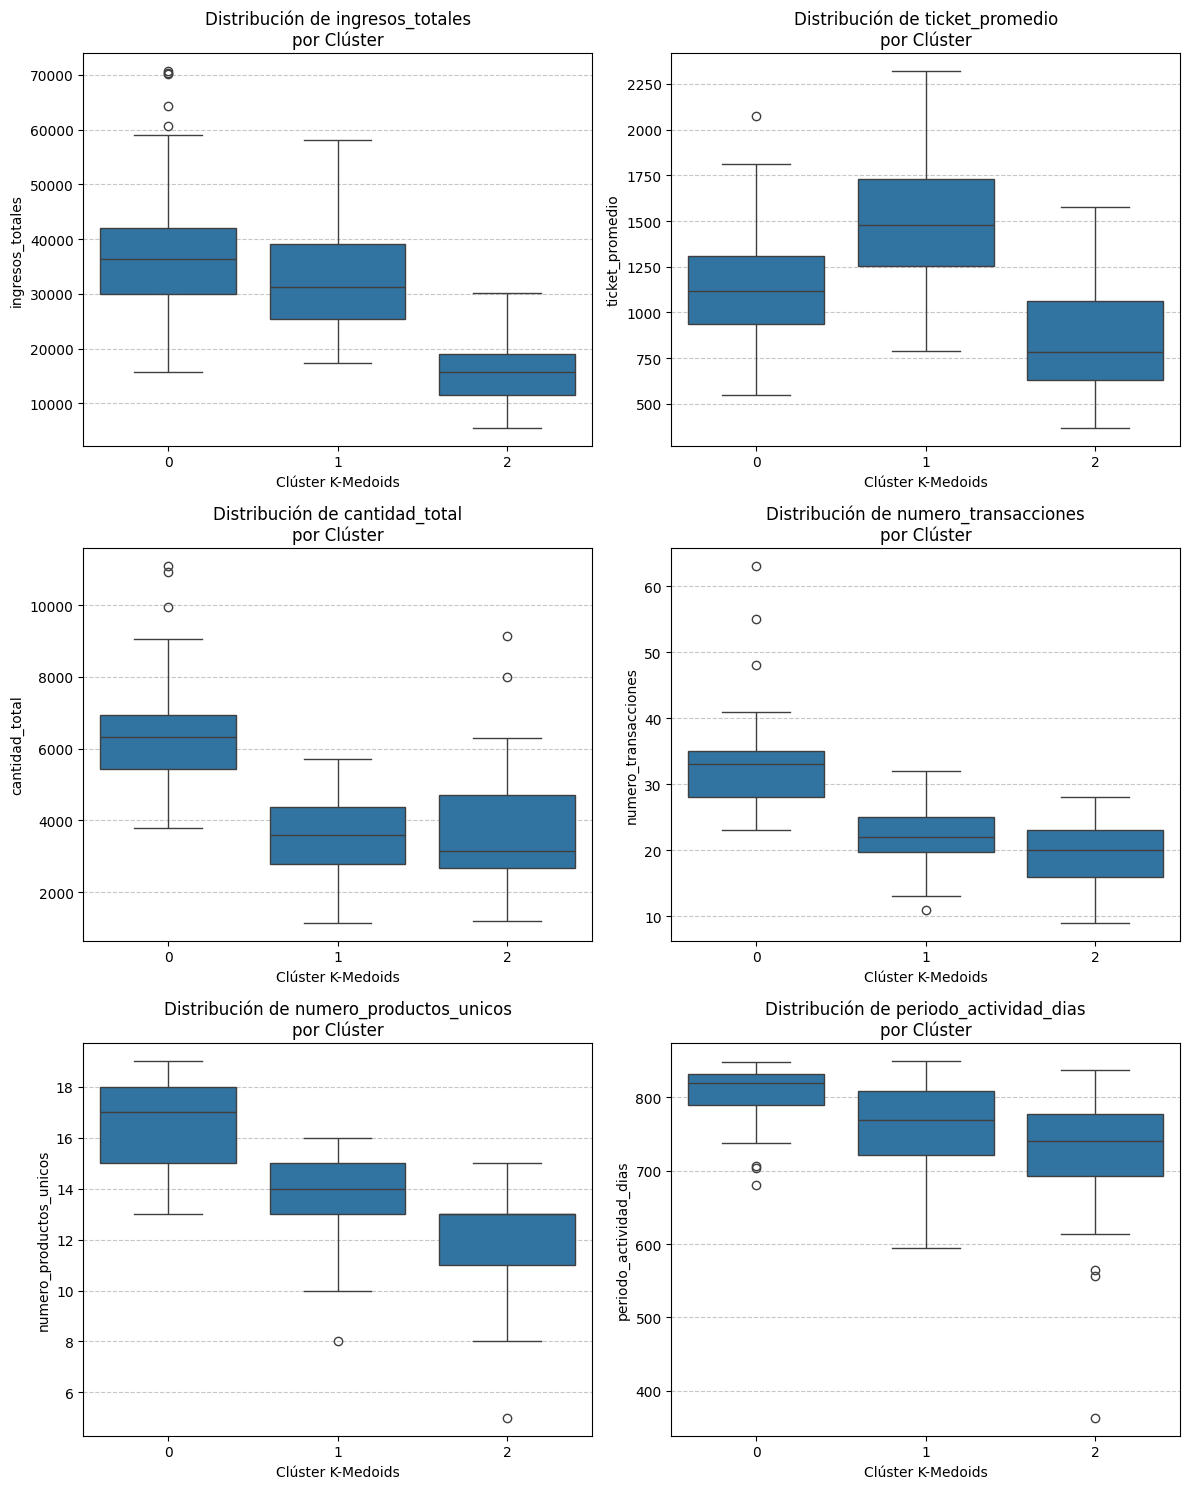

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Asumiendo que 'df_pymes_con_clusters' existe ---

print("\n--- Bloque 3: Visualizando Características por Clúster (K-Medoids) ---")

# Seleccionar las columnas numéricas que queremos visualizar
columnas_a_visualizar = [
    'ingresos_totales',
    'ticket_promedio',
    'cantidad_total',
    'numero_transacciones',
    'numero_productos_unicos',
    'periodo_actividad_dias'
]

# Determinar el número de filas y columnas para los subplots
n_cols = 2
n_rows = (len(columnas_a_visualizar) + n_cols - 1) // n_cols

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten() # Aplanar el array de ejes para iterar fácilmente

# Generar un gráfico de cajas para cada característica
for i, col in enumerate(columnas_a_visualizar):
    sns.boxplot(x='cluster_kmedoids', y=col, data=df_pymes_con_clusters, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}\npor Clúster')
    axes[i].set_xlabel('Clúster K-Medoids')
    axes[i].set_ylabel(col)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ocultar ejes no utilizados si el número de gráficos es impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


--- Bloque 4: Visualizando Características con Gráficos de Barras ---


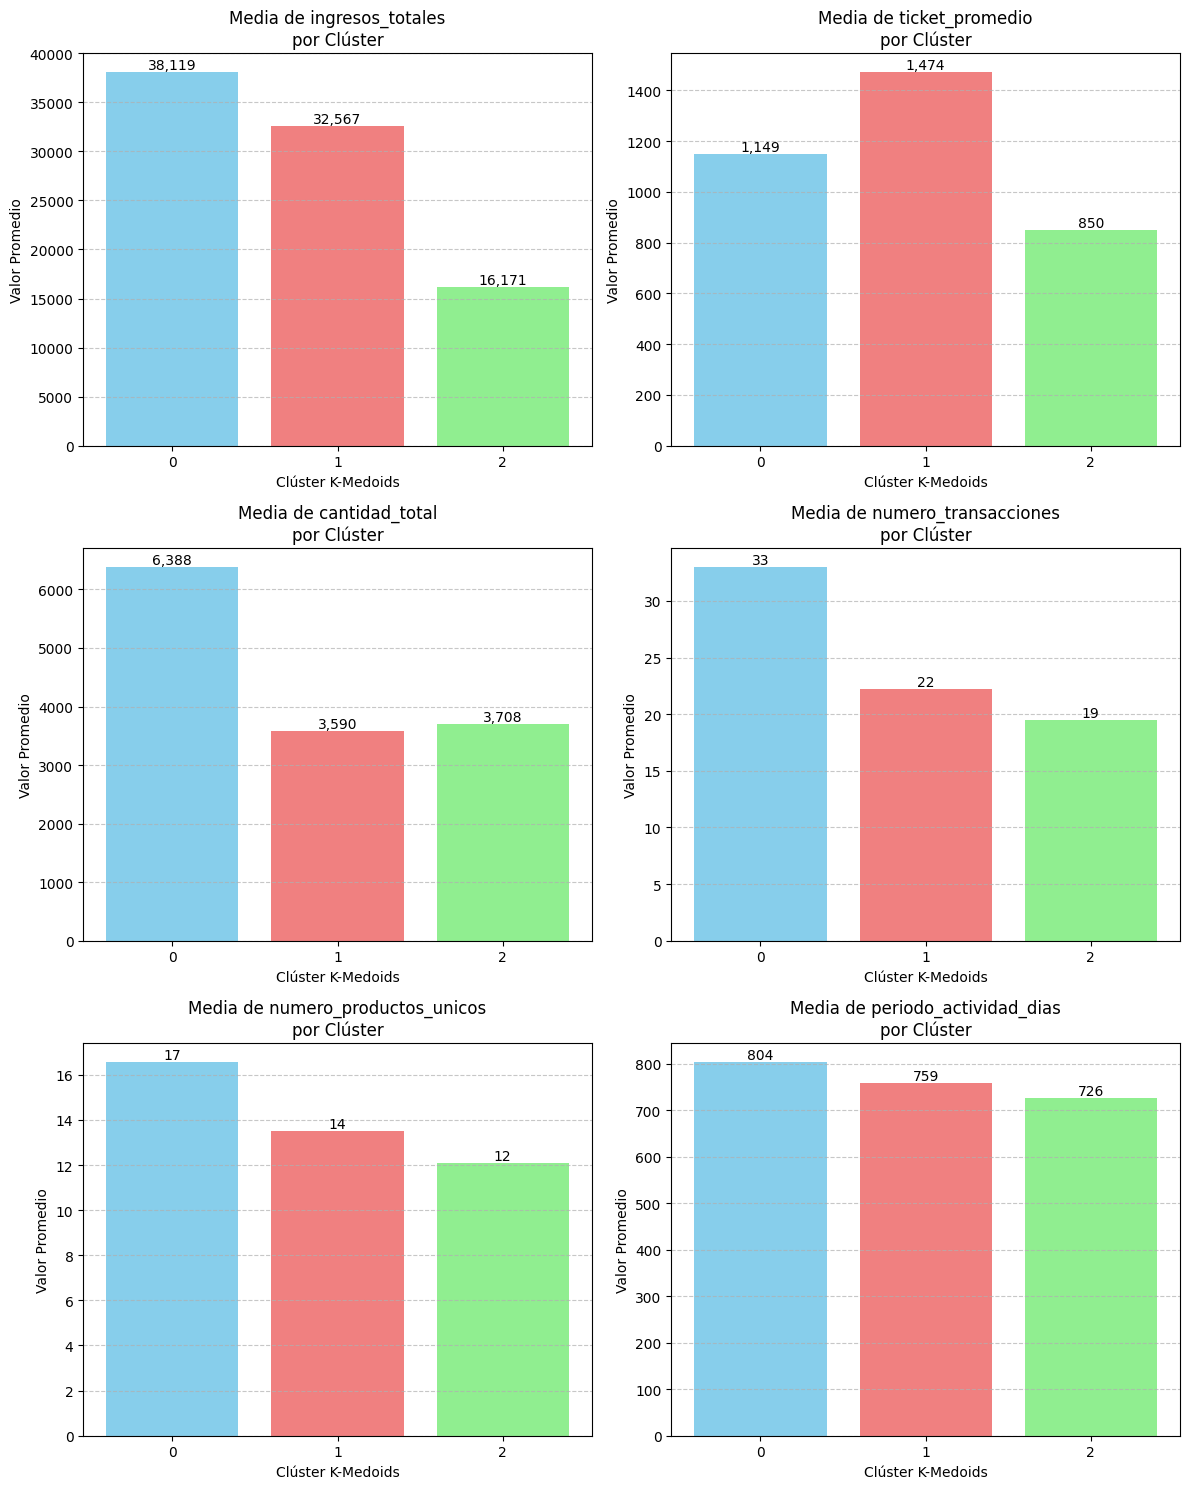

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Asumiendo que 'df_pymes_con_clusters' existe ---

print("\n--- Bloque 4: Visualizando Características con Gráficos de Barras ---")

# Seleccionar las columnas numéricas que queremos visualizar
columnas_a_visualizar = [
    'ingresos_totales',
    'ticket_promedio',
    'cantidad_total',
    'numero_transacciones',
    'numero_productos_unicos',
    'periodo_actividad_dias'
]

# Calcular las medias (igual que kmedoids_summary)
summary_means = df_pymes_con_clusters.groupby('cluster_kmedoids')[columnas_a_visualizar].mean()

# Determinar el número de filas y columnas para los subplots
n_cols = 2
n_rows = (len(columnas_a_visualizar) + n_cols - 1) // n_cols

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten() # Aplanar el array de ejes

# Generar un gráfico de barras para cada característica
colors = ['skyblue', 'lightcoral', 'lightgreen'] # Colores para los clústeres

for i, col in enumerate(columnas_a_visualizar):
    means = summary_means[col]
    axes[i].bar(means.index.astype(str), means.values, color=colors) # Usamos .astype(str) para etiquetas claras
    axes[i].set_title(f'Media de {col}\npor Clúster')
    axes[i].set_xlabel('Clúster K-Medoids')
    axes[i].set_ylabel('Valor Promedio')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    # Añadir valores en las barras
    for index, value in enumerate(means.values):
        axes[i].text(index, value, f'{value:,.0f}', ha='center', va='bottom')


# Ocultar ejes no utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Fase 7: Creación de dashboard interactivo

15:18:08 - cmdstanpy - INFO - Chain [1] start processing
15:18:08 - cmdstanpy - INFO - Chain [1] done processing
15:18:08 - cmdstanpy - INFO - Chain [1] done processing
15:18:08 - cmdstanpy - INFO - Chain [1] start processing
15:18:08 - cmdstanpy - INFO - Chain [1] start processing
15:18:08 - cmdstanpy - INFO - Chain [1] done processing
15:18:08 - cmdstanpy - INFO - Chain [1] done processing
15:18:09 - cmdstanpy - INFO - Chain [1] start processing
15:18:09 - cmdstanpy - INFO - Chain [1] start processing



--- Bloque 2 (Revisado): Re-entrenamiento, Pronóstico y Guardado ---
Se pronosticarán 19 meses hasta Diciembre de 2026.
Re-entrenando Clúster 0...
Pronóstico para Clúster 0 generado y guardado como 'pronostico_prophet_cluster_0.csv'.
Re-entrenando Clúster 1...
Pronóstico para Clúster 1 generado y guardado como 'pronostico_prophet_cluster_1.csv'.
Re-entrenando Clúster 2...


15:18:09 - cmdstanpy - INFO - Chain [1] done processing


Pronóstico para Clúster 2 generado y guardado como 'pronostico_prophet_cluster_2.csv'.

--- Generando Gráficos de Pronósticos Prophet hasta 2026 ---


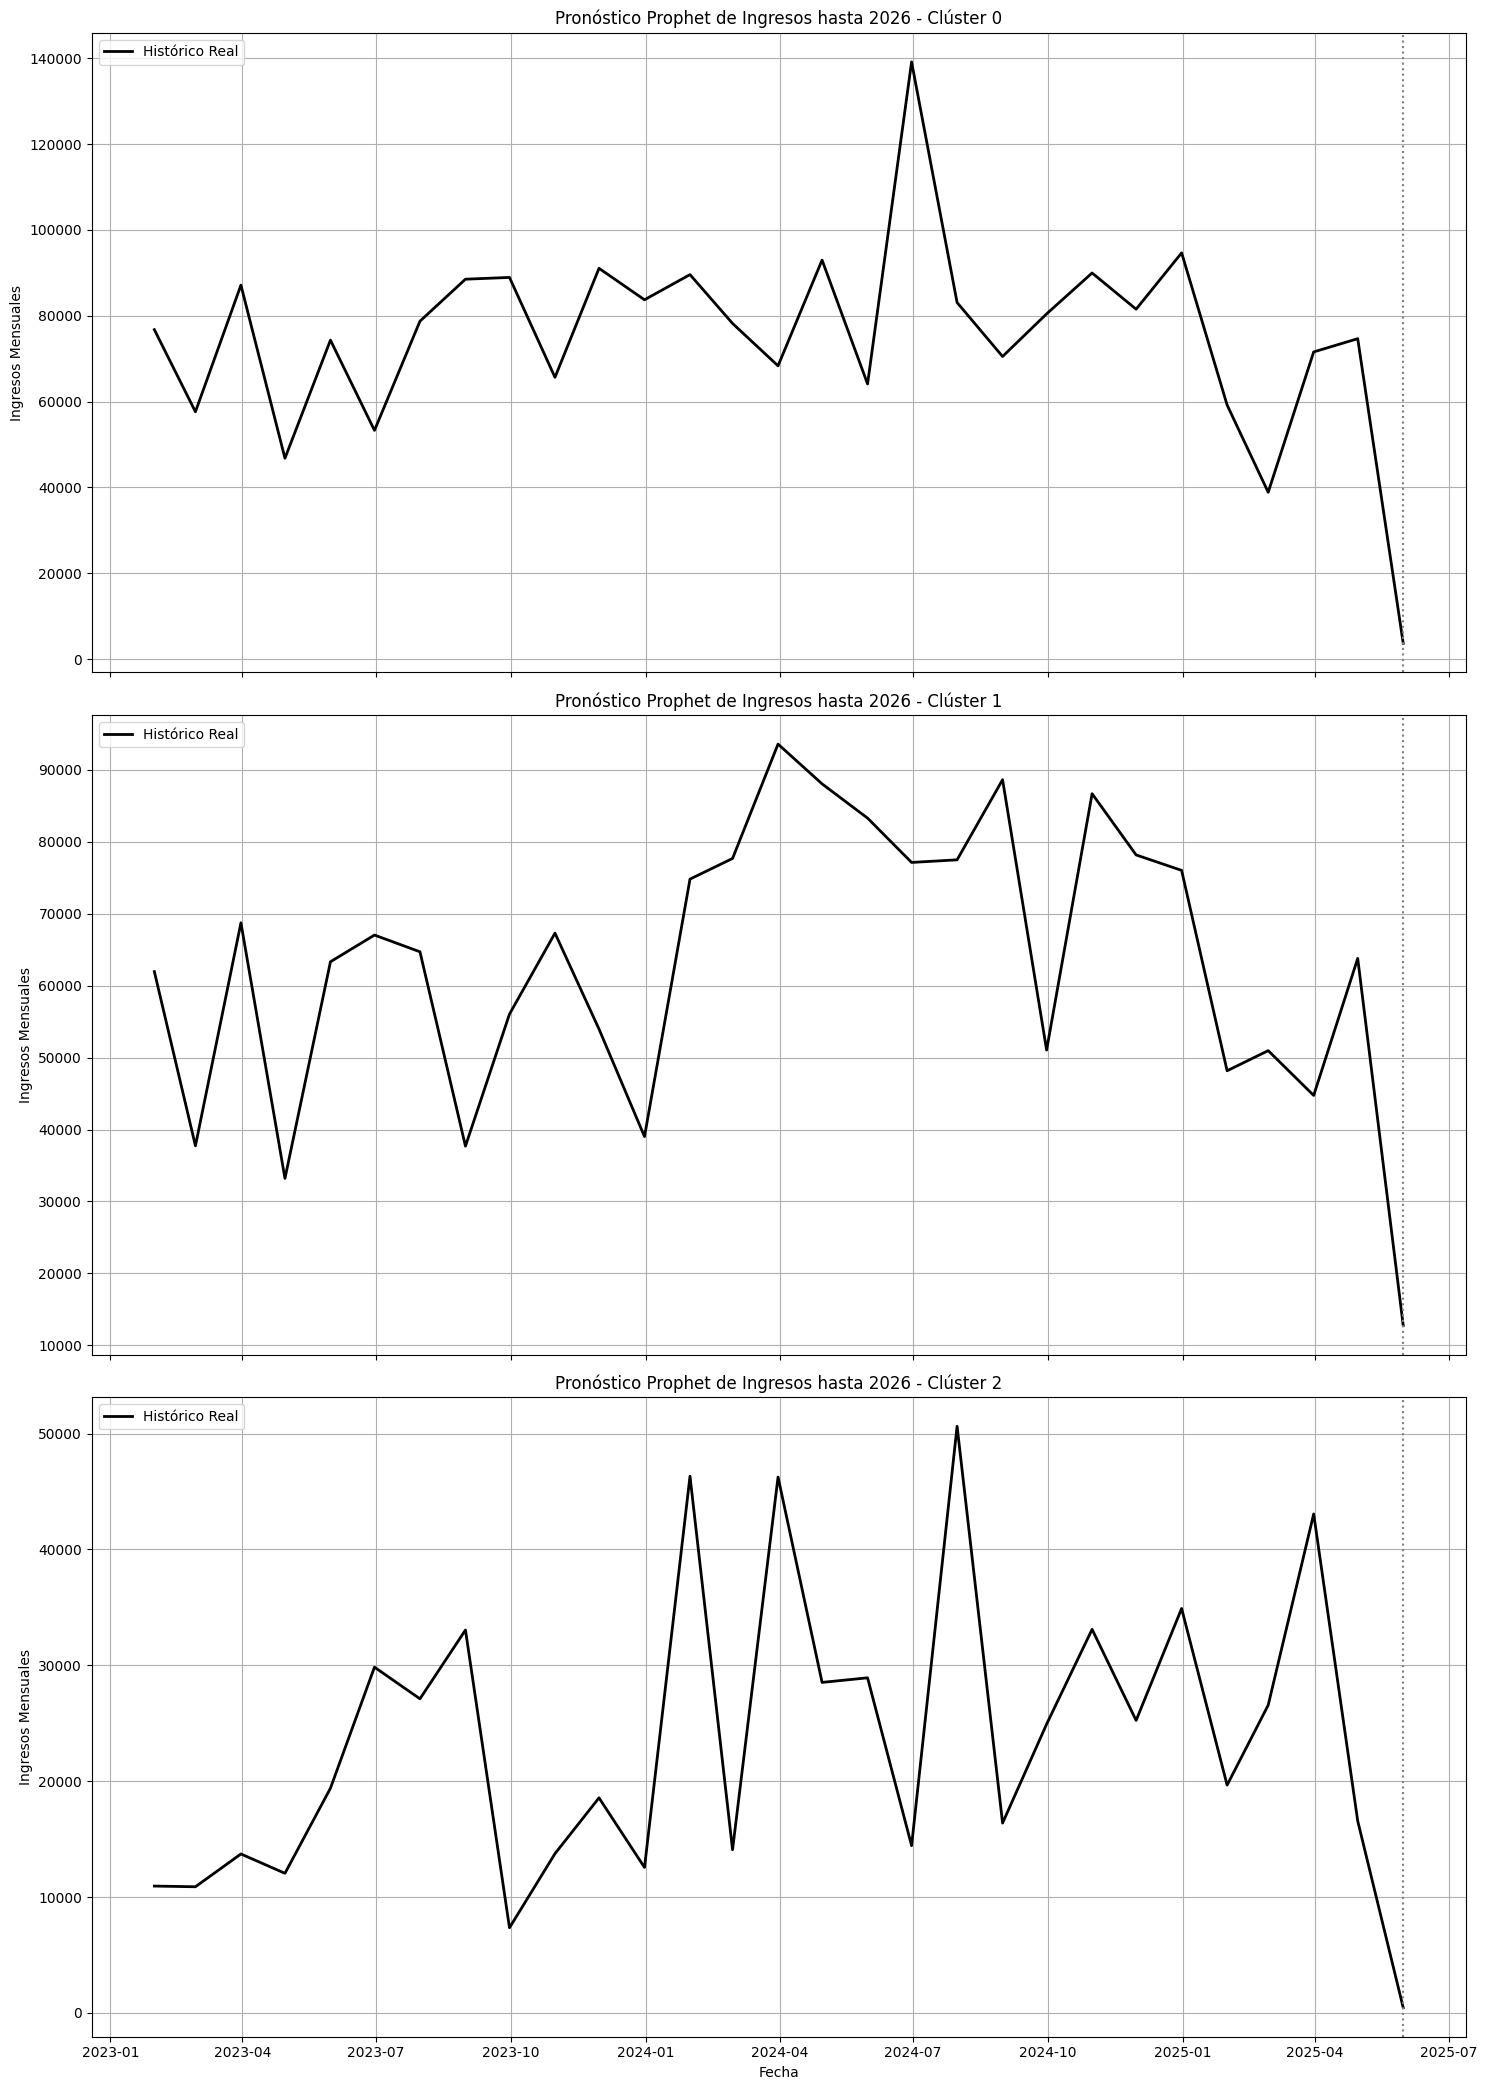


--- ¡Archivos de pronóstico CSV generados! ---


In [15]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# --- Asumiendo que 'df_ts_mensual' existe (del Bloque 1) ---

print("\n--- Bloque 2 (Revisado): Re-entrenamiento, Pronóstico y Guardado ---")

# --- PASO 5.4: RE-ENTRENAR Y PRONOSTICAR HASTA 2026 ---
ultima_fecha = df_ts_mensual.index[-1]
fecha_final_pronostico = pd.to_datetime('2026-12-31')
meses_a_predecir = (fecha_final_pronostico.year - ultima_fecha.year) * 12 + \
                   (fecha_final_pronostico.month - ultima_fecha.month)
print(f"Se pronosticarán {meses_a_predecir} meses hasta Diciembre de 2026.")

pronosticos_2026 = {}
modelos_full = {} # Guardaremos los modelos re-entrenados por si acaso

for cluster_id_str in df_ts_mensual.columns: # Iteramos sobre las columnas (strings '0', '1', '2')
    cluster_id = int(cluster_id_str) # Convertimos a entero para los nombres de archivo
    print(f"Re-entrenando Clúster {cluster_id}...")
    
    full_series = df_ts_mensual[cluster_id_str]
    df_prophet_full = full_series.reset_index()
    df_prophet_full.columns = ['ds', 'y']
    df_prophet_full['ds'] = pd.to_datetime(df_prophet_full['ds'])

    try:
        # Instanciar y entrenar con TODOS los datos
        model_full = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
        model_full.fit(df_prophet_full)
        modelos_full[str(cluster_id)] = model_full # Guardar el modelo

        # Crear futuro y predecir
        future_2026 = model_full.make_future_dataframe(periods=meses_a_predecir, freq='M')
        forecast_2026 = model_full.predict(future_2026)
        
        # Guardar TODO el forecast (histórico + futuro) o solo futuro
        # Guardaremos solo el futuro para que sea más claro
        forecast_futuro = forecast_2026[forecast_2026['ds'] > ultima_fecha][['ds', 'yhat']].set_index('ds')
        pronosticos_2026[str(cluster_id)] = forecast_futuro
        
        # <<< ¡¡AQUÍ GUARDAMOS EL ARCHIVO!! >>>
        file_name = f'pronostico_prophet_cluster_{cluster_id}.csv'
        forecast_futuro.to_csv(file_name)
        print(f"Pronóstico para Clúster {cluster_id} generado y guardado como '{file_name}'.")

    except Exception as e:
        print(f"ERROR al procesar Clúster {cluster_id}: {e}")
        pronosticos_2026[str(cluster_id)] = None


# --- PASO 5.5: VISUALIZAR RESULTADOS (Opcional, ya lo vimos pero bueno tenerlo) ---
print("\n--- Generando Gráficos de Pronósticos Prophet hasta 2026 ---")
n_clusters = len(df_ts_mensual.columns)
fig, axes = plt.subplots(n_clusters, 1, figsize=(15, 7 * n_clusters), sharex=True)
if n_clusters == 1: axes = [axes]

for i, cluster_id_str in enumerate(df_ts_mensual.columns):
    ax = axes[i]
    ax.plot(df_ts_mensual.index, df_ts_mensual[cluster_id_str], label='Histórico Real', color='black', linewidth=2)
    if pronosticos_2026.get(cluster_id_str) is not None:
        ax.plot(pronosticos_2026[cluster_id_str].index, pronosticos_2026[cluster_id_str]['yhat'], label='Pronóstico 2026', color='red', linestyle='--')
    ax.set_title(f'Pronóstico Prophet de Ingresos hasta 2026 - Clúster {cluster_id_str}')
    ax.set_ylabel('Ingresos Mensuales')
    ax.legend()
    ax.grid(True)
    ax.axvline(ultima_fecha, color='gray', linestyle=':', label='Inicio Pronóstico')

plt.xlabel('Fecha')
plt.tight_layout()
plt.show()

print("\n--- ¡Archivos de pronóstico CSV generados! ---")

In [ ]:
# Crear un DataFrame solo con numerodoi y razonsocial, eliminando duplicados
df_mapeo = df[['numerodoi', 'razonsocial']].drop_duplicates().reset_index(drop=True)

# Guardar este mapeo en un archivo CSV
file_name_mapeo = 'mapeo_pymes.csv'
df_mapeo.to_csv(file_name_mapeo, index=False)

print(f"Mapeo de PYMEs guardado como '{file_name_mapeo}'.")
print(f"Número de PYMEs únicas: {len(df_mapeo)}")
print("\nPrimeras 5 PYMEs:")
print(df_mapeo.head())

Mapeo de PYMEs guardado como 'mapeo_pymes.csv'.


In [ ]:
# Guardar X_procesado como un archivo CSV para facilidad de carga
# Es un array NumPy, así que lo convertimos a DataFrame primero
if 'X_procesado' in locals(): # Verifica si X_procesado existe
    df_X_procesado = pd.DataFrame(X_procesado)
    file_name_X_procesado = 'X_procesado_para_pca.csv'
    df_X_procesado.to_csv(file_name_X_procesado, index=False)
    print(f"Datos X_procesado guardados como '{file_name_X_procesado}'.")
    print(f"Forma de X_procesado: {X_procesado.shape}")
else:
    print("ERROR: La variable 'X_procesado' no se encontró. Por favor, genérala primero.")


Datos X_procesado guardados como 'X_procesado_para_pca.csv'.


In [16]:
# DataFrame con PYMEs y clústeres
df_pymes_con_clusters.to_csv('pymes_con_clusters.csv', index=False)
print("Archivo 'pymes_con_clusters.csv' guardado.")

# DataFrame con series temporales históricas
df_ts_mensual.to_csv('ts_mensual_historico.csv')
print("Archivo 'ts_mensual_historico.csv' guardado.")

# DataFrame con características promedio
if 'kmedoids_summary' in locals():
    kmedoids_summary.to_csv('kmedoids_summary.csv')
    print("Archivo 'kmedoids_summary.csv' guardado.")
else:
    # Crear el resumen si no existe
    columnas_numericas_analisis = [
        'ingresos_totales',
        'ticket_promedio',
        'cantidad_total',
        'cantidad_promedio_venta',
        'numero_transacciones',
        'numero_productos_unicos',
        'periodo_actividad_dias'
    ]
    kmedoids_summary = df_pymes_con_clusters.groupby('cluster_kmedoids')[columnas_numericas_analisis].mean()
    kmedoids_summary.to_csv('kmedoids_summary.csv')
    print("Archivo 'kmedoids_summary.csv' creado y guardado.")

print("\n¡Todos los archivos necesarios para el dashboard han sido generados!")
print("\nArchivos generados:")
print("- pymes_con_clusters.csv")
print("- ts_mensual_historico.csv")
print("- kmedoids_summary.csv")
print("- mapeo_pymes.csv")
print("- X_procesado_para_pca.csv")
print("- pronostico_prophet_cluster_0.csv")
print("- pronostico_prophet_cluster_1.csv")
print("- pronostico_prophet_cluster_2.csv")

Archivo 'pymes_con_clusters.csv' guardado.
Archivo 'ts_mensual_historico.csv' guardado.
Archivo 'kmedoids_summary.csv' guardado.

¡Todos los archivos necesarios para el dashboard han sido generados!

Archivos generados:
- pymes_con_clusters.csv
- ts_mensual_historico.csv
- kmedoids_summary.csv
- mapeo_pymes.csv
- X_procesado_para_pca.csv
- pronostico_prophet_cluster_0.csv
- pronostico_prophet_cluster_1.csv
- pronostico_prophet_cluster_2.csv
